In [1]:
!pip install beautifulsoup4

In [2]:
!pip install requests


In [29]:
import requests
from bs4 import BeautifulSoup



In [27]:
!pip install textblob

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl


In [28]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob

In [5]:
page=requests.get('https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2')

In [72]:
url='https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='

In [89]:
review=[]
check=[]
for i in range(1,501):
    url='https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='
    url=url+str(i)
    check.append(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    bunch=soup.find_all(class_='a-size-base review-text review-text-content')
    for i in range (len(bunch)):
        a=bunch[i].get_text()
        review.append(a)
    
    
    
    

In [85]:
check[1:20]

['https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2',
 'https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=3',
 'https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=4',
 'https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=5',
 'https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=6',
 'https://www.amazon.in/Mi-Smart-Band-Waterproof-up/product-reviews/B07WLL998K/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=7',
 'https://www.amazon.in/Mi-Smart-B

In [93]:
review[14]

"\nThis is very good product . I loved it ❤️ mi smartband 4 . I think it's not accurate show's heart rate . I bought it during 1st sell .  And it's My first fitness band from mi . I think  It gives around 16 / 17 days battery backup . I used from 3days it's only consumed 16% of battery charging .\n"

In [94]:
len(review)

3960

In [95]:

from string import punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words=stopwords.words('English')
type(stop_words)

punct=list(punctuation)
type(punct)

remove_words=stop_words+punct

type(remove_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


list

In [96]:
from textblob import Word
from nltk.stem import LancasterStemmer 
ps=LancasterStemmer()

def preprocessing(review):
    lower=review.lower() #converting to lower case
    blob=TextBlob(lower)
    tokenized=blob.words # tokenize to words
    clean_words=[i for i in tokenized if i not in remove_words] # remove stopwords
    remove_digits = [i for i in clean_words if not i.isdigit()] # remove numbers
    lemmatize= [Word(i).lemmatize() for i in remove_digits]
    #stemming=[ps.stem(i) for i in lemmatize]
    binding= " ".join(lemmatize)
    return binding

In [97]:
def adjectives(text):
    t=''
    blob=TextBlob(text)
    for words,pos in blob.tags:
        if(pos=='JJ'or pos=='JJR' or pos=='JJS'):
            t=t+' '+words
    return t

In [98]:
df3=[]
for i in range(len(review)):
    z=preprocessing(review[i])
    a=adjectives(z)
    df3.append(a)

In [99]:
new_df=pd.DataFrame(df3)
new_df.columns=['review']

In [100]:
new_df.head()

,review
0,mi upgrade first usage update usage pro new b...
1,fit awesome detailed sleep sleep indian spo2 ...
2,good
3,
4,upgrade big bad frustrated least next usb ove...


In [37]:

!pip install wordcloud

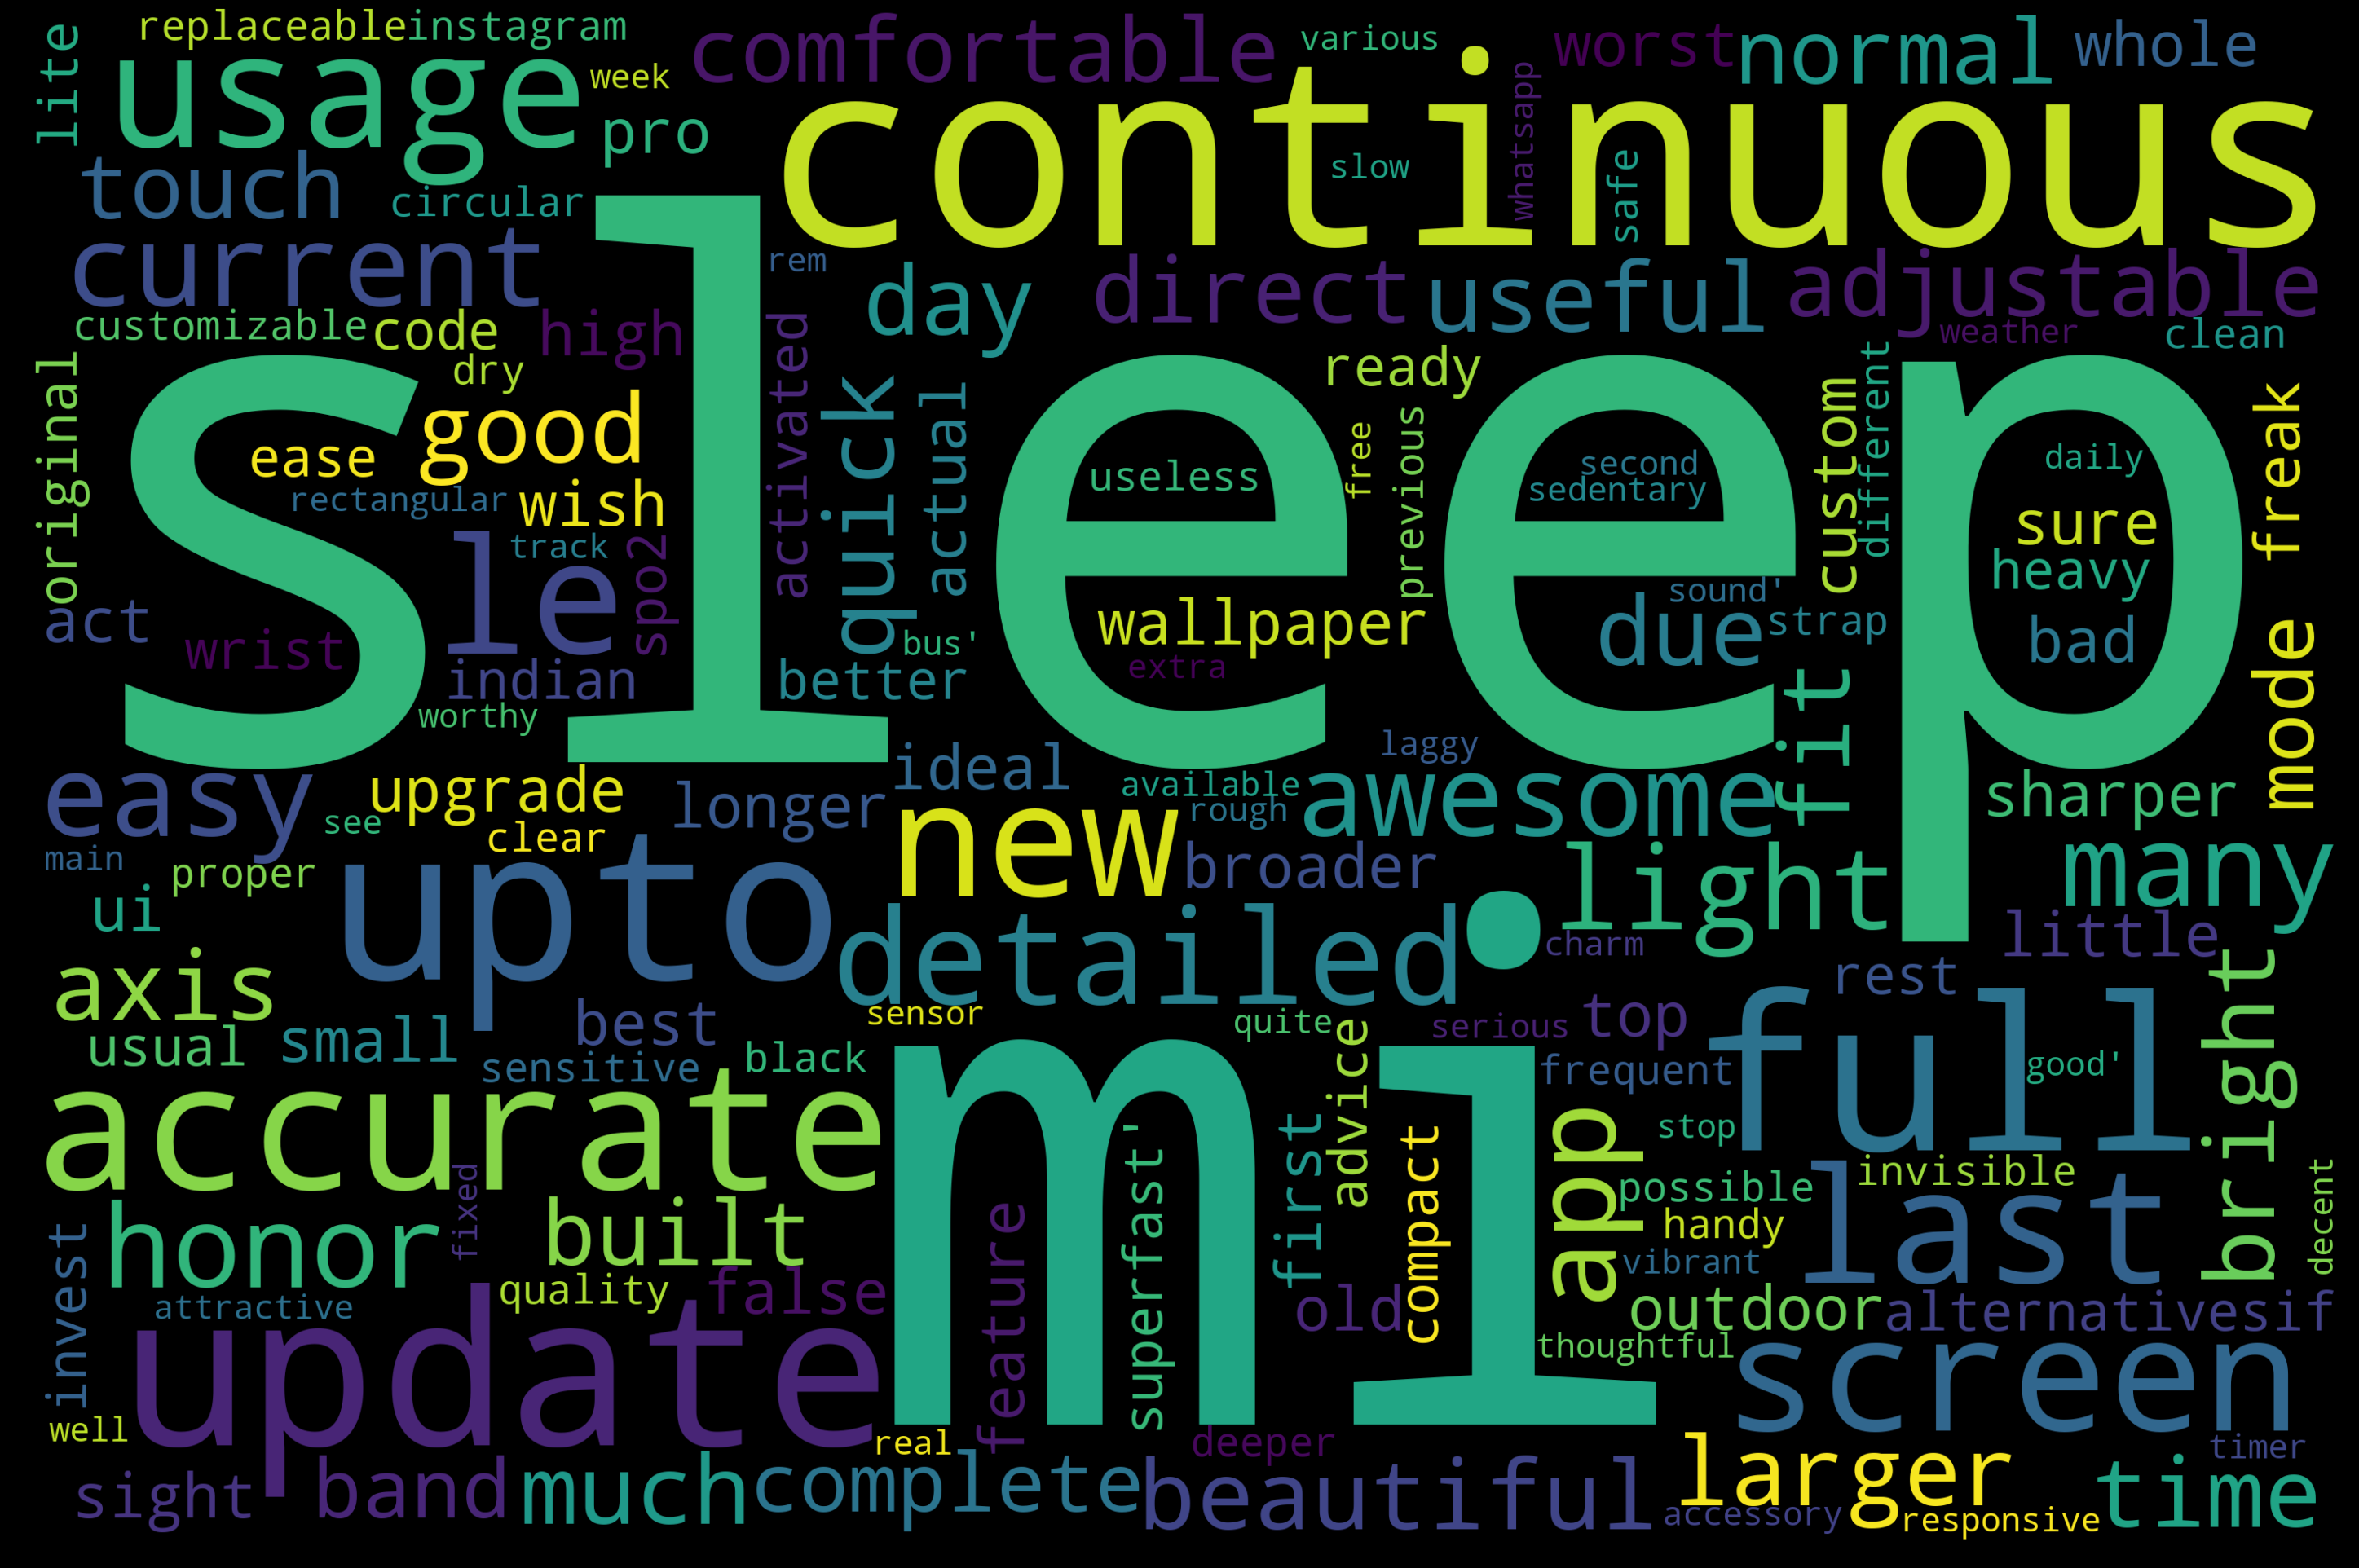

In [102]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = new_df.review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()